# Etapa1

In [1]:
# Importar bibliotecas necesarias
import os
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

# Ruta al dataset descargado
dataset_path = "Garbage classification" 

# 1. Cargar el dataset y explorar carpetas
def explorar_dataset(path):
    clases = os.listdir(path)
    print(f"Clases disponibles: {clases}")
    total_imagenes = 0
    distribucion = {}
    for clase in clases:
        clase_path = os.path.join(path, clase)
        imagenes = os.listdir(clase_path)
        distribucion[clase] = len(imagenes)
        total_imagenes += len(imagenes)
    print(f"Total de imágenes: {total_imagenes}")
    return distribucion

distribucion = explorar_dataset(dataset_path)

Clases disponibles: ['trash', 'cardboard', 'plastic', 'metal', 'paper', 'glass']
Total de imágenes: 3934


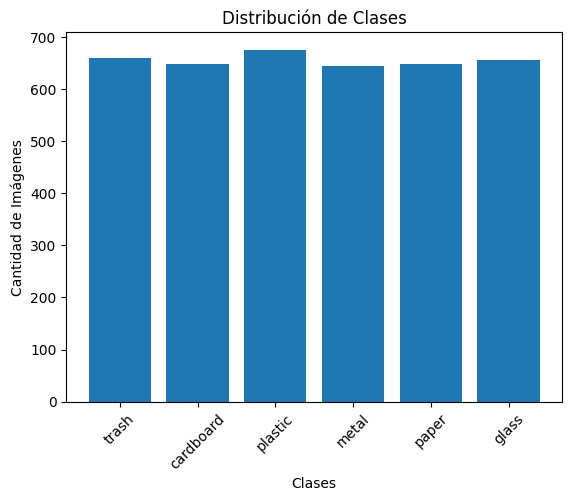

In [2]:
# 2. Visualizar la distribución de clases
def visualizar_distribucion(distribucion):
    clases, cantidades = zip(*distribucion.items())
    plt.bar(clases, cantidades)
    plt.xlabel('Clases')
    plt.ylabel('Cantidad de Imágenes')
    plt.title('Distribución de Clases')
    plt.xticks(rotation=45)
    plt.show()

visualizar_distribucion(distribucion)

In [3]:
import os
import requests
from tqdm import tqdm
from PIL import Image, ImageEnhance, ImageOps
import random

# Función para aplicar aumentaciones
def augment_image(image, output_folder, base_name, augment_count):
    """
    Aplica transformaciones a la imagen para aumentar el dataset.
    """
    for i in range(augment_count):
        # Realiza transformaciones aleatorias
        img = image.copy()
        
        # Rotación aleatoria entre -15° y 15°
        angle = random.randint(-15, 15)
        img = img.rotate(angle)

        # Volteo horizontal con 50% de probabilidad
        if random.random() > 0.5:
            img = ImageOps.mirror(img)

        # Ajuste de brillo aleatorio (80% a 120%)
        enhancer = ImageEnhance.Brightness(img)
        brightness = random.uniform(0.8, 1.2)
        img = enhancer.enhance(brightness)

        # Ajuste de contraste aleatorio (80% a 120%)
        enhancer = ImageEnhance.Contrast(img)
        contrast = random.uniform(0.8, 1.2)
        img = enhancer.enhance(contrast)

        # Guardar la imagen aumentada
        output_path = os.path.join(output_folder, f"{base_name}_aug_{i}.jpg")
        img.save(output_path)

# Función para descargar y procesar imágenes
def download_and_augment_images(url_file, category_folder, target_size=(128, 128), augment_count=4):
    """
    Descarga imágenes desde un archivo de texto con URLs, las procesa (redimensiona y aumenta)
    y las guarda en la carpeta indicada.
    """
    os.makedirs(category_folder, exist_ok=True)

    with open(url_file, 'r') as file:
        urls = file.readlines()

    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

    for i, url in enumerate(tqdm(urls, desc=f"Procesando imágenes para {category_folder}")):
        url = url.strip()
        if not url:
            continue
        try:
            response = requests.get(url, stream=True, timeout=10, headers=headers)
            response.raise_for_status()

            # Obtener la extensión válida
            file_extension = url.split('.')[-1].split('?')[0].lower()
            if file_extension not in ['jpg', 'jpeg', 'png', 'gif', 'webp']:
                file_extension = 'jpg'

            # Crear nombre base del archivo
            base_name = f"{category_folder.split(os.sep)[-1]}_{i}"

            # Guardar la imagen original
            image_path = os.path.join(category_folder, f"{base_name}.jpg")
            with open(image_path, 'wb') as img_file:
                img_file.write(response.content)

            # Abrir la imagen, redimensionarla y generar aumentaciones
            img = Image.open(image_path).convert("RGB")
            img = img.resize(target_size)

            # Guardar la imagen redimensionada
            img.save(image_path)

            # Aplicar aumentaciones
            augment_image(img, category_folder, base_name, augment_count)
        except Exception as e:
            print(f"Error descargando {url}: {e}")

# Directorio principal y archivos de entrada
base_dir = "./Garbage classification"
categories = {
    "trash": "trash.txt",
    "plastic": "plastic.txt",
    "paper": "paper.txt",
    "metal": "metal.txt",
    "glass": "glass.txt",
    "cardboard": "cardboard.txt"
}

# Descargar y procesar imágenes para cada categoría
for category, file_name in categories.items():
    file_path = f"./{file_name}"  # Asegúrate de que los archivos están en el mismo nivel que el notebook
    category_folder = os.path.join(base_dir, category)
    download_and_augment_images(file_path, category_folder, target_size=(128, 128), augment_count=4)


Procesando imágenes para ./Garbage classification/trash: 100%|█| 51/51 [00:19<00
Procesando imágenes para ./Garbage classification/plastic:  40%|▍| 21/52 [00:32<

Error descargando https://images.unsplash.com/photo-1536939459926-301728717817?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8OHx8cGxhc3RpY298ZW58MHx8MHx8fDA%3D: HTTPSConnectionPool(host='images.unsplash.com', port=443): Max retries exceeded with url: /photo-1536939459926-301728717817?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8OHx8cGxhc3RpY298ZW58MHx8MHx8fDA%3D (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x709c890998b0>: Failed to establish a new connection: [Errno 101] Network is unreachable'))


Procesando imágenes para ./Garbage classification/plastic: 100%|█| 52/52 [00:40<
Procesando imágenes para ./Garbage classification/paper:  69%|▋| 35/51 [00:10<00

Error descargando https://amcecuador.com/wp-content/uploads/2021/03/1001553.png: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


Procesando imágenes para ./Garbage classification/paper:  82%|▊| 42/51 [00:13<00

Error descargando https://www.carlin.es/resources/img/products/multi/166115_s6_4b38f.jpg: 403 Client Error: Forbidden for url: https://www.carlin.es/resources/img/products/multi/166115_s6_4b38f.jpg


Procesando imágenes para ./Garbage classification/paper: 100%|█| 51/51 [00:16<00
Procesando imágenes para ./Garbage classification/metal: 100%|█| 50/50 [00:21<00
Procesando imágenes para ./Garbage classification/glass:  88%|▉| 45/51 [00:11<00

Error descargando https://interiorsingular.com/wp-content/uploads/2021/03/jarron-de-vidrio-marron-matraz-Ambiente-Andrea-House-e1616072173654.jpeg: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


Procesando imágenes para ./Garbage classification/glass: 100%|█| 51/51 [00:13<00
Procesando imágenes para ./Garbage classification/cardboard:   8%| | 4/50 [00:01

Error descargando https://foodpacservice.com/wp-content/uploads/2023/09/carton-corrugado.jpg: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


Procesando imágenes para ./Garbage classification/cardboard: 100%|█| 50/50 [00:1


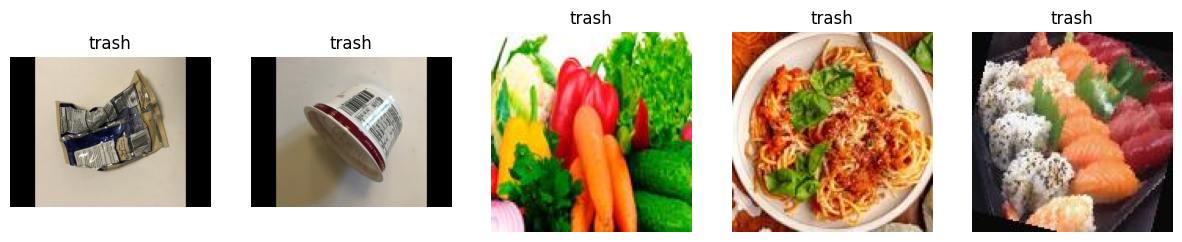

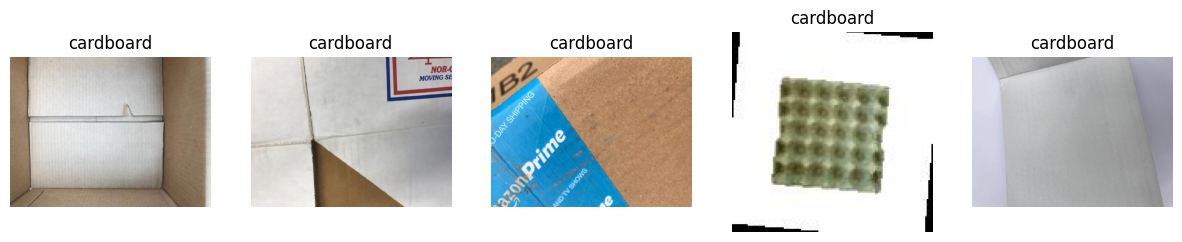

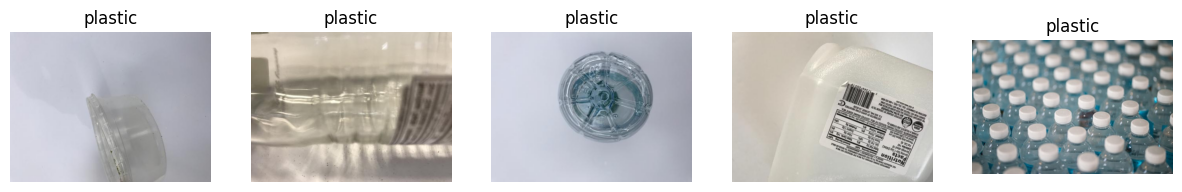

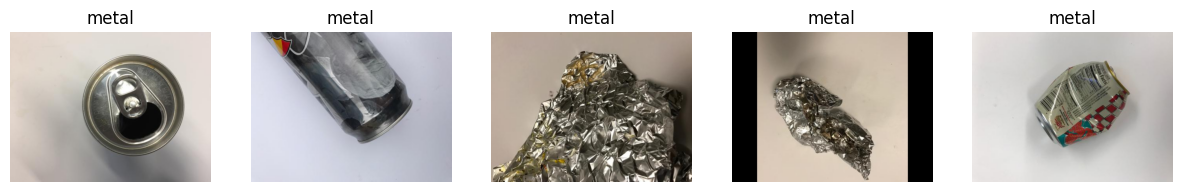

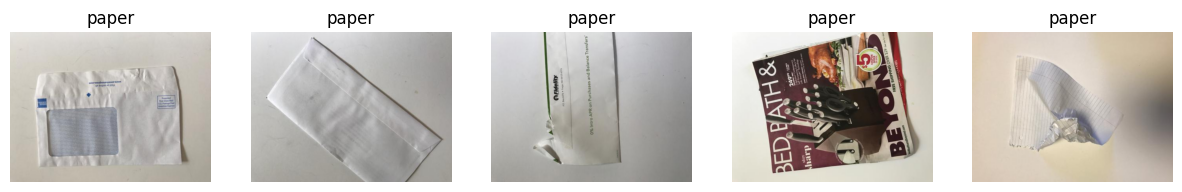

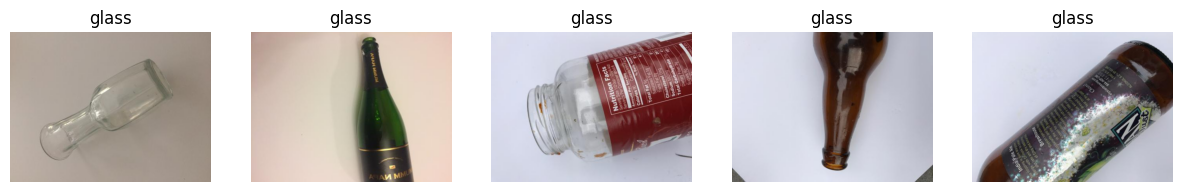

In [4]:
# 3. Mostrar ejemplos de imágenes
def mostrar_imagenes(path, clase, num_imagenes=5):
    clase_path = os.path.join(path, clase)
    imagenes = os.listdir(clase_path)[:num_imagenes]
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(imagenes):
        img_path = os.path.join(clase_path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_imagenes, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(clase)
    plt.show()

# Mostrar imágenes de cada clase (muestra un ejemplo por clase)
for clase in distribucion.keys():
    mostrar_imagenes(dataset_path, clase)

In [5]:
# Importar bibliotecas necesarias
import os

# Ruta al dataset descargado
dataset_path = "Garbage classification"

# Función para contar imágenes por categoría
def contar_imagenes_por_categoria(path):
    clases = os.listdir(path)
    conteo_categorias = {}
    for clase in clases:
        clase_path = os.path.join(path, clase)
        if os.path.isdir(clase_path):  # Asegurarse de que sea un directorio
            num_imagenes = len([f for f in os.listdir(clase_path) if os.path.isfile(os.path.join(clase_path, f))])
            conteo_categorias[clase] = num_imagenes
    return conteo_categorias

# Obtener y mostrar el conteo
conteo = contar_imagenes_por_categoria(dataset_path)

# Mostrar el conteo en consola
print("Conteo de imágenes por categoría:")
for categoria, cantidad in conteo.items():
    print(f"{categoria}: {cantidad} imágenes")

Conteo de imágenes por categoría:
trash: 859 imágenes
cardboard: 849 imágenes
plastic: 888 imágenes
metal: 852 imágenes
paper: 864 imágenes
glass: 860 imágenes


Aumentando la clase 'trash' de 859 a 594 imágenes...
Aumentando la clase 'cardboard' de 849 a 594 imágenes...
Aumentando la clase 'plastic' de 888 a 594 imágenes...
Aumentando la clase 'metal' de 852 a 594 imágenes...
Aumentando la clase 'paper' de 864 a 594 imágenes...
Aumentando la clase 'glass' de 860 a 594 imágenes...

Nuevo conteo de imágenes por categoría después de la aumentación:
trash: 859 imágenes
cardboard: 849 imágenes
plastic: 888 imágenes
metal: 852 imágenes
paper: 864 imágenes
glass: 860 imágenes


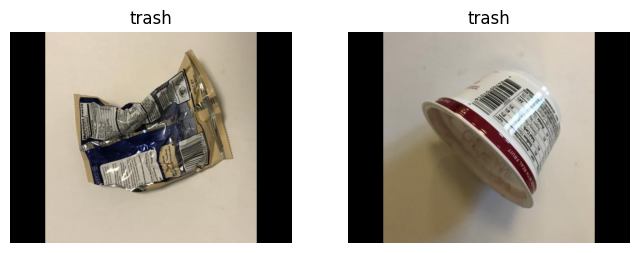

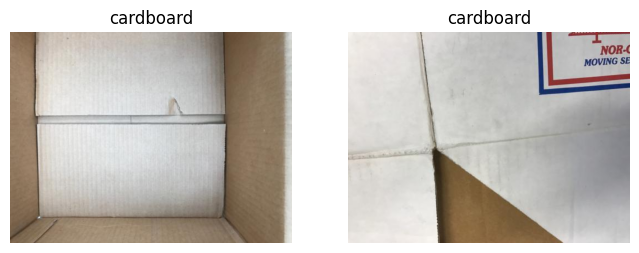

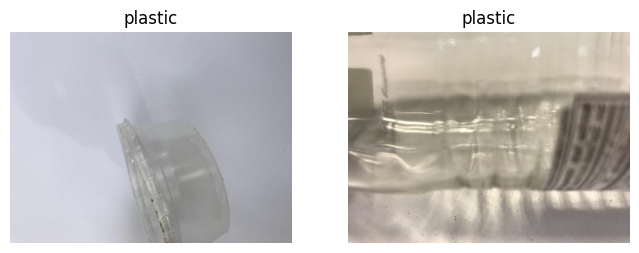

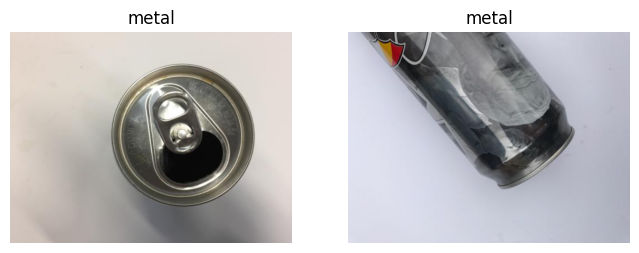

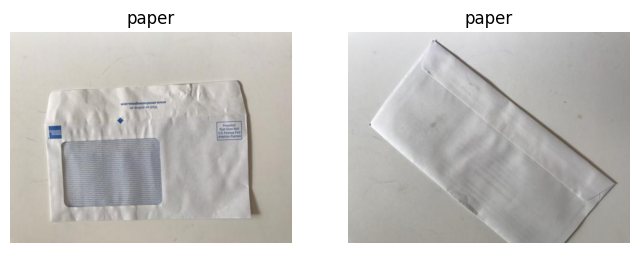

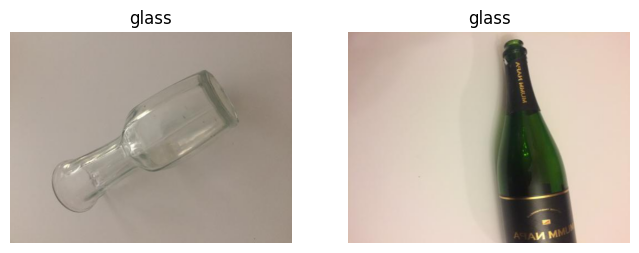

In [6]:
from PIL import Image, ImageOps
import random
import os

# Función para aumentar las imágenes en cada categoría
def aumentar_imagenes(dataset_path, max_images=594):
    clases = os.listdir(dataset_path)
    for clase in clases:
        clase_path = os.path.join(dataset_path, clase)
        if os.path.isdir(clase_path):
            imagenes = os.listdir(clase_path)
            num_actual = len(imagenes)
            print(f"Aumentando la clase '{clase}' de {num_actual} a {max_images} imágenes...")
            
            while num_actual < max_images:
                # Elegir una imagen al azar para aumentación
                img_name = random.choice(imagenes)
                img_path = os.path.join(clase_path, img_name)
                with Image.open(img_path) as img:
                    # Realizar transformaciones aleatorias
                    transformacion = random.choice(["flip", "rotate"])
                    if transformacion == "flip":
                        img_aumentada = ImageOps.mirror(img)
                    elif transformacion == "rotate":
                        img_aumentada = img.rotate(random.choice([90, 180, 270]))
                    
                    # Guardar la imagen aumentada
                    nueva_imagen_nombre = f"{clase}_{num_actual}.jpg"
                    nueva_imagen_path = os.path.join(clase_path, nueva_imagen_nombre)
                    img_aumentada.save(nueva_imagen_path)
                    
                    # Actualizar el contador
                    num_actual += 1

# Ruta del dataset
dataset_path = "Garbage classification"  # Cambia esto a tu ruta real

# Aumentar imágenes en todas las categorías
aumentar_imagenes(dataset_path)

# Verificar conteo después de la aumentación
conteo_post_aumentacion = contar_imagenes_por_categoria(dataset_path)

# Mostrar el nuevo conteo
print("\nNuevo conteo de imágenes por categoría después de la aumentación:")
for categoria, cantidad in conteo_post_aumentacion.items():
    print(f"{categoria}: {cantidad} imágenes")

# Mostrar 2 imágenes por categoría
def mostrar_dos_imagenes_por_categoria(path, categorias):
    for clase in categorias:
        clase_path = os.path.join(path, clase)
        imagenes = os.listdir(clase_path)[:2]
        plt.figure(figsize=(8, 4))
        for i, img_name in enumerate(imagenes):
            img_path = os.path.join(clase_path, img_name)
            img = Image.open(img_path)
            plt.subplot(1, 2, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(clase)
        plt.show()

mostrar_dos_imagenes_por_categoria(dataset_path, conteo_post_aumentacion.keys())

# Etapa2

In [7]:
import os
from PIL import Image

# Ruta del dataset
dataset_path = "Garbage classification"  # Cambia esto a tu ruta real

# Ruta para guardar las imágenes redimensionadas
resized_dataset_path = "Garbage classification resized"
os.makedirs(resized_dataset_path, exist_ok=True)

# Redimensionar imágenes
def redimensionar_imagenes(input_path, output_path, target_size=(224, 224)):
    for root, dirs, files in os.walk(input_path):
        for dir_name in dirs:
            # Crear directorios de salida para cada categoría
            input_dir = os.path.join(root, dir_name)
            output_dir = os.path.join(output_path, dir_name)
            os.makedirs(output_dir, exist_ok=True)
            
            for file_name in os.listdir(input_dir):
                if file_name.endswith(('.png', '.jpg', '.jpeg')):
                    input_file_path = os.path.join(input_dir, file_name)
                    output_file_path = os.path.join(output_dir, file_name)
                    
                    # Redimensionar y guardar la imagen
                    with Image.open(input_file_path) as img:
                        img_resized = img.resize(target_size)
                        img_resized.save(output_file_path)

# Ejecutar la redimensión
redimensionar_imagenes(dataset_path, resized_dataset_path)

print(f"Imágenes redimensionadas y guardadas en: {resized_dataset_path}")


Imágenes redimensionadas y guardadas en: Garbage classification resized


In [8]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
import numpy as np
from PIL import Image
import os

# 1. Cargar el modelo preentrenado
model = EfficientNetB0(weights='imagenet')  # Modelo preentrenado
model.summary()  # Opcional: Ver la estructura del modelo

# 2. Función para cargar imágenes ya redimensionadas y aplicar preprocesamiento
def load_image(img_path):
    img = Image.open(img_path).convert('RGB')  # Asegurarse de que sea RGB
    img_array = np.array(img)  # Convertir a array numpy
    img_array = preprocess_input(img_array)  # Normalizar para EfficientNet
    return np.expand_dims(img_array, axis=0)  # Añadir dimensión de batch

# 3. Probar el modelo con imágenes redimensionadas
dataset_path = "Garbage classification resized"  # Cambia a la ruta redimensionada
categories = os.listdir(dataset_path)  # Obtener categorías

print("Probando el modelo en imágenes del dataset:")
for category in categories:
    category_path = os.path.join(dataset_path, category)
    images = [os.path.join(category_path, f) for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    # Probar las primeras 2 imágenes de cada categoría
    for img_path in images[:2]:
        input_tensor = load_image(img_path)  # Cargar y preprocesar imagen
        predictions = model.predict(input_tensor)  # Realizar predicción
        decoded_predictions = decode_predictions(predictions, top=3)[0]  # Decodificar las 3 mejores predicciones

        # Mostrar resultados
        print(f"\nImagen: {img_path}")
        for i, (class_id, class_name, confidence) in enumerate(decoded_predictions):
            print(f"  {i+1}. {class_name}: {confidence:.2f}")


2024-12-04 15:29:15.560436: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-04 15:29:15.560807: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-04 15:29:15.562590: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-04 15:29:15.566983: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733326155.574338   16540 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733326155.57

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 5,330,571 (20.33 MB)

 Trainable params: 5,288,548 (20.17 MB)

 Non-trainable params: 42,023 (164.16 KB)

Probando el modelo en imágenes del dataset:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step

Imagen: Garbage classification resized/trash/trash_478.jpg
  1. breastplate: 0.13
  2. buckle: 0.10
  3. holster: 0.07
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Imagen: Garbage classification resized/trash/trash_515.jpg
  1. oil_filter: 0.40
  2. spotlight: 0.19
  3. thimble: 0.15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Imagen: Garbage classification resized/cardboard/cardboard102.jpg
  1. wardrobe: 0.24
  2. refrigerator: 0.12
  3. shoji: 0.06
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Imagen: Garbage classification resized/cardboard/cardboard100.jpg
  1. envelope: 0.39
  2. carton: 0.35
  3. packet: 0.01
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Imagen: Garbage classification resized/plastic/plastic327.jpg
  1. nipple: 0.15
  2. spotlight: 0.06
  3. oxygen_mask: 0.05
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Imagen: Garbage classification resized/plastic/plastic_558.jpg
  1. beaker: 0.29
  2. Petri_dish: 0.12
  3. 

# Etapa 3

In [9]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Ruta al dataset
dataset_path = "Garbage classification resized"  # Cambia esto a tu ruta redimensionada

# Obtener todas las imágenes y sus etiquetas
def obtener_imagenes_y_etiquetas(path):
    data = []
    categories = os.listdir(path)
    for category in categories:
        category_path = os.path.join(path, category)
        if os.path.isdir(category_path):
            images = [os.path.join(category_path, img) for img in os.listdir(category_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
            for img in images:
                data.append({"path": img, "label": category})
    return pd.DataFrame(data)

# Crear DataFrame de imágenes y etiquetas
df = obtener_imagenes_y_etiquetas(dataset_path)
print(f"Total de imágenes: {len(df)}")

# Dividir en train (80%) y test (20%)
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Mostrar conteo de cada categoría en train y test
print("\nDistribución en train:")
print(train_df['label'].value_counts())
print("\nDistribución en test:")
print(test_df['label'].value_counts())

# Guardar los DataFrames en archivos CSV (opcional)
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

print("\nDivisión completada. Archivos guardados como 'train_data.csv' y 'test_data.csv'")


Total de imágenes: 5102

Distribución en train:
label
paper        687
plastic      683
trash        681
metal        678
glass        678
cardboard    674
Name: count, dtype: int64

Distribución en test:
label
paper        172
plastic      171
glass        170
trash        170
cardboard    169
metal        169
Name: count, dtype: int64

División completada. Archivos guardados como 'train_data.csv' y 'test_data.csv'


In [10]:
# Importar EfficientNetB0 para verificar el número de capas
from tensorflow.keras.applications import EfficientNetB0

# Cargar el modelo preentrenado
model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Número total de capas en EfficientNetB0
num_layers = len(model.layers)
num_layers
# Hemos visto que el modelo preentrenado tiene 238 capas y cogeremos solo las últimas 38 capas

238

Total de imágenes: 5102

Distribución en train:
label
paper        687
plastic      683
trash        681
metal        678
glass        678
cardboard    674
Name: count, dtype: int64

Distribución en test:
label
paper        172
plastic      171
glass        170
trash        170
cardboard    169
metal        169
Name: count, dtype: int64

División completada. Archivos guardados como 'train_data.csv' y 'test_data.csv'
Found 4081 validated image filenames belonging to 6 classes.
Found 1021 validated image filenames belonging to 6 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         7,686 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,057,257 (15.48 MB)

 Trainable params: 3,485,818 (13.30 MB)

 Non-trainable params: 571,439 (2.18 MB)

Epoch 1/50


/home/reboot-student/anaconda3/envs/data_analysis/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


255/255 ━━━━━━━━━━━━━━━━━━━━ 74s 255ms/step - accuracy: 0.3603 - loss: 1.7118 - val_accuracy: 0.8026 - val_loss: 0.7919
Epoch 2/50
  1/255 ━━━━━━━━━━━━━━━━━━━━ 55s 218ms/step - accuracy: 0.6250 - loss: 1.3758

2024-12-04 15:30:33.969886: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/reboot-student/anaconda3/envs/data_analysis/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-12-04 15:30:34.098086: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6250 - loss: 1.3758 - val_accuracy: 0.7692 - val_loss: 0.7264
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 67s 263ms/step - accuracy: 0.7286 - loss: 0.9174 - val_accuracy: 0.9048 - val_loss: 0.4872
Epoch 4/50
  1/255 ━━━━━━━━━━━━━━━━━━━━ 51s 203ms/step - accuracy: 0.6875 - loss: 0.8762

2024-12-04 15:31:41.901397: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6875 - loss: 0.8762 - val_accuracy: 0.9231 - val_loss: 0.4637
Epoch 5/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 66s 259ms/step - accuracy: 0.8360 - loss: 0.6240 - val_accuracy: 0.9474 - val_loss: 0.3310
Epoch 6/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.3149 - val_accuracy: 0.9231 - val_loss: 0.2705
Epoch 7/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 66s 258ms/step - accuracy: 0.9029 - loss: 0.4353 - val_accuracy: 0.9583 - val_loss: 0.2781
Epoch 8/50
  1/255 ━━━━━━━━━━━━━━━━━━━━ 54s 216ms/step - accuracy: 1.0000 - loss: 0.2793

2024-12-04 15:33:55.099537: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.2793 - val_accuracy: 1.0000 - val_loss: 0.2425
Epoch 9/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 65s 256ms/step - accuracy: 0.9178 - loss: 0.3682 - val_accuracy: 0.9653 - val_loss: 0.2325
Epoch 10/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.9375 - loss: 0.2719 - val_accuracy: 0.9231 - val_loss: 0.4347
Epoch 11/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 65s 256ms/step - accuracy: 0.9502 - loss: 0.2818 - val_accuracy: 0.9702 - val_loss: 0.2227
Epoch 12/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.2173 - val_accuracy: 1.0000 - val_loss: 0.1574
Epoch 13/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 65s 254ms/step - accuracy: 0.9612 - loss: 0.2403 - val_accuracy: 0.9673 - val_loss: 0.2143
Epoch 14/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.2479 - val_accuracy: 1.0000 - val_loss: 0.1146
Epoch 15/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 65s 255ms/step - accuracy: 0.9618 - loss: 0.2310 - val_acc

2024-12-04 15:38:17.994470: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


255/255 ━━━━━━━━━━━━━━━━━━━━ 65s 255ms/step - accuracy: 0.9706 - loss: 0.1932 - val_accuracy: 0.9762 - val_loss: 0.2058
Epoch 18/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.1797 - val_accuracy: 1.0000 - val_loss: 0.1084
Epoch 19/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 65s 254ms/step - accuracy: 0.9815 - loss: 0.1718 - val_accuracy: 0.9772 - val_loss: 0.1882
Epoch 20/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.9375 - loss: 0.1962 - val_accuracy: 1.0000 - val_loss: 0.1474
Epoch 21/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 65s 254ms/step - accuracy: 0.9785 - loss: 0.1681 - val_accuracy: 0.9812 - val_loss: 0.1794
Epoch 22/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.1811 - val_accuracy: 1.0000 - val_loss: 0.1081
Epoch 23/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 65s 256ms/step - accuracy: 0.9834 - loss: 0.1553 - val_accuracy: 0.9742 - val_loss: 0.1796
Epoch 24/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.2226 - val_ac

2024-12-04 15:47:02.399426: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0880 - val_accuracy: 1.0000 - val_loss: 0.0725
Epoch 33/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 65s 254ms/step - accuracy: 0.9908 - loss: 0.1101 - val_accuracy: 0.9782 - val_loss: 0.1610
Epoch 34/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 1.0000 - loss: 0.0703 - val_accuracy: 0.8462 - val_loss: 0.3424
Epoch 35/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 65s 254ms/step - accuracy: 0.9882 - loss: 0.1065 - val_accuracy: 0.9782 - val_loss: 0.1577
Epoch 36/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0969 - val_accuracy: 1.0000 - val_loss: 0.0666
Epoch 37/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 65s 254ms/step - accuracy: 0.9890 - loss: 0.1027 - val_accuracy: 0.9752 - val_loss: 0.1571
Epoch 38/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 1.0000 - loss: 0.0658 - val_accuracy: 0.9231 - val_loss: 0.2061
Epoch 39/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 65s 255ms/step - accuracy: 0.9919 - loss: 0.0946 - val_

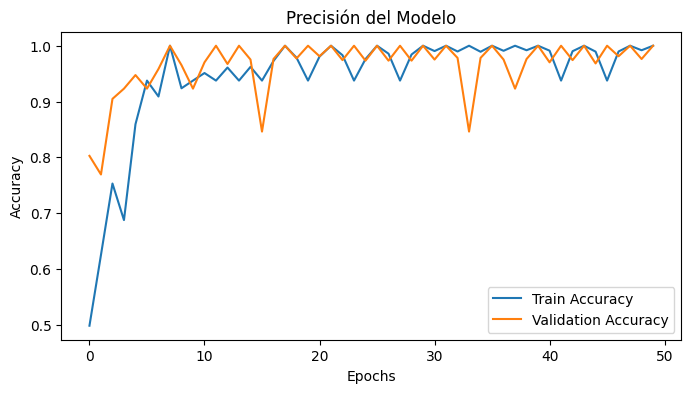

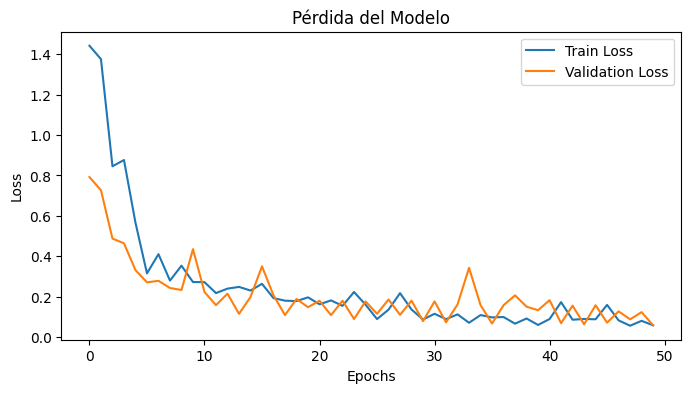

In [11]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers
import tensorflow as tf
import matplotlib.pyplot as plt

# Ruta al dataset
dataset_path = "Garbage classification resized"  # Cambia esto a tu ruta redimensionada

# Obtener todas las imágenes y sus etiquetas
def obtener_imagenes_y_etiquetas(path):
    data = []
    categories = os.listdir(path)
    for category in categories:
        category_path = os.path.join(path, category)
        if os.path.isdir(category_path):
            images = [os.path.join(category_path, img) for img in os.listdir(category_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
            for img in images:
                data.append({"path": img, "label": category})
    return pd.DataFrame(data)

# Crear DataFrame de imágenes y etiquetas
df = obtener_imagenes_y_etiquetas(dataset_path)
print(f"Total de imágenes: {len(df)}")

# Dividir en train (80%) y test (20%)
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Mostrar conteo de cada categoría en train y test
print("\nDistribución en train:")
print(train_df['label'].value_counts())
print("\nDistribución en test:")
print(test_df['label'].value_counts())

# Guardar los DataFrames en archivos CSV (opcional)
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

print("\nDivisión completada. Archivos guardados como 'train_data.csv' y 'test_data.csv'")

# Crear generadores de datos con aumentación
from tensorflow.keras.applications.efficientnet import preprocess_input

IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 50
LEARNING_RATE = 0.0001

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Configurar generadores
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="path",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="path",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# ====================
# 3. Construcción del Modelo
# ====================

# Cargar modelo preentrenado EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las primeras capas (opcional: ajustar el rango para datos específicos)
for layer in base_model.layers[:-100]:  # Ajusta el rango según sea necesario
    layer.trainable = False
for layer in base_model.layers[-100:]:  # este es el que tenemos que coger 
    layer.trainable = True

# Construir modelo personalizado
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.6),  # Aumentar Dropout
    layers.Dense(6, activation='softmax', kernel_regularizer=regularizers.l2(0.01))  # Corregido
])

# Resumen del modelo
model.summary()

# ====================
# 4. Compilación del Modelo
# ====================

# Compilar el modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Ajustar el nombre del archivo para cumplir con el formato Keras
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)  # Cambiado a .keras
]

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=callbacks
)

# Guardar el modelo entrenado en formato Keras
model.save("garbage_classifier_efficientnet.keras")  # Cambiado a .keras
print("Modelo entrenado y guardado como 'garbage_classifier_efficientnet.keras'")

# ====================
# 6. Evaluación y Visualización
# ====================

# Gráfica de precisión
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Precisión del Modelo')
plt.show()

# Gráfica de pérdida
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Pérdida del Modelo')
plt.show()


2025-02-03 14:46:41.751425: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Modelo cargado exitosamente.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


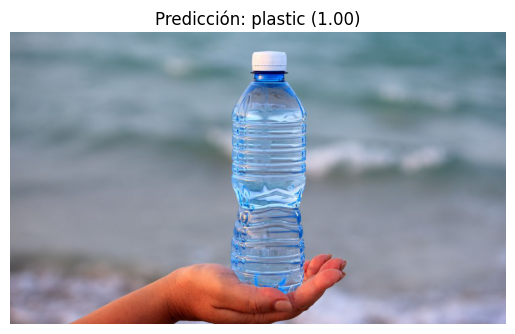

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# ====================
# 1. Cargar el modelo entrenado
# ====================
# Asegúrate de haber entrenado y guardado el modelo previamente
model = load_model("garbage_classifier_efficientnet.keras")
print("Modelo cargado exitosamente.")

# ====================
# 2. Función para preprocesar una imagen
# ====================
def preprocess_image(img_path, target_size=(224, 224)):
    """
    Preprocesa una imagen desde una ruta local.
    """
    img = Image.open(img_path).convert('RGB')  # Convertir a RGB
    img = img.resize(target_size)  # Redimensionar a 224x224
    img_array = np.array(img)  # Convertir a array numpy
    img_array = preprocess_input(img_array)  # Aplicar preprocesamiento de EfficientNet
    return np.expand_dims(img_array, axis=0)  # Añadir dimensión de batch

# ====================
# 3. Cargar y preprocesar imágenes desde una URL
# ====================
def load_image_from_url(url, target_size=(224, 224)):
    """
    Descarga una imagen desde una URL, la redimensiona y la preprocesa.
    """
    response = requests.get(url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content)).convert('RGB')
        img = img.resize(target_size)  # Redimensionar a 224x224
        img_array = np.array(img)  # Convertir a array numpy
        img_array = preprocess_input(img_array)  # Aplicar preprocesamiento de EfficientNet
        return np.expand_dims(img_array, axis=0)  # Añadir dimensión de batch
    else:
        raise Exception(f"Error al descargar la imagen. Código de estado: {response.status_code}")

# ====================
# 4. Predicción con condición
# ====================
def predict_image_from_url_or_path(img_path_or_url, threshold=0.5, target_size=(224, 224)):
    """
    Predice si una imagen es basura o "otros" desde una ruta local o URL.
    """
    # Determinar si es una URL o una ruta local
    if img_path_or_url.startswith("http://") or img_path_or_url.startswith("https://"):
        input_tensor = load_image_from_url(img_path_or_url, target_size)
    else:
        input_tensor = preprocess_image(img_path_or_url, target_size)
    
    # Realizar predicción
    predictions = model.predict(input_tensor)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)  # Confianza de la predicción más alta

    # Nombres de las clases (cambia según tu dataset)
    class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
    
    # Condicional: Si la confianza es baja para todas las clases
    if confidence < threshold:
        return "Otros (No es basura)", confidence
    else:
        return class_names[predicted_class], confidence

# ====================
# 5. Mostrar la imagen y predicción
# ====================
def predict_and_show_from_url_or_path(img_path_or_url, threshold=0.5, target_size=(224, 224)):
    """
    Predice si una imagen es basura o "otros" y la muestra con la predicción.
    """
    # Cargar la imagen desde URL o ruta
    if img_path_or_url.startswith("http://") or img_path_or_url.startswith("https://"):
        response = requests.get(img_path_or_url)
        img = Image.open(BytesIO(response.content)).convert('RGB')
    else:
        img = Image.open(img_path_or_url)
    
    # Realizar predicción
    predicted_class, confidence = predict_image_from_url_or_path(img_path_or_url, threshold, target_size)
    
    # Mostrar la imagen
    plt.imshow(img)
    plt.title(f"Predicción: {predicted_class} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

# ====================
# 6. Pruebas con imágenes locales o de internet
# ====================

# Prueba con una imagen local
#local_image_path = "ruta_a_tu_imagen_local.jpg"  # Cambia esto por la ruta de una imagen local
#predict_and_show_from_url_or_path(local_image_path)

# Prueba con una imagen de internet
internet_image_url = "https://www.rotolia.com/blog/wp-content/uploads/2022/11/botella-pet-plastico.jpg"  # Cambia esto por una URL
predict_and_show_from_url_or_path(internet_image_url)
